## Exploring data from a file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('~/Documents/programming/3_research_analysis/real_estate_data.csv', sep = '\t')  #local path
except:
    data = pd.read_csv('/real_estate_data.csv', sep = '\t')  # server path

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Data preprocessing

There are 23699 lines in total, there are quite a lot of missing values in some columns, for example:
- **ceiling_height** about half of the values are omitted and having studied the spread of data for this parameter, it is clear that there are problems with some lines, it is impossible to imagine an apartment with ceilings of 100 meters or vice versa with ceilings of 1 meter. According to the norms, the height of the ceilings should not be lower than 2.4 meters, and in pre-revolutionary houses, in the “Stalinka” buildings, the height of the ceilings was 3.2–5 m, that is, all values below 2.4 and above 5 meters are most likely erroneously entered data. Change empty and abnormal values in the ceiling_height column to the column average
- **floors_total** missing 83 values, a small percentage of the total sample size, replace with the floor value
- **living_area** missing 1903 values will be changed to the average value depending on the total area.
- **is_apartment** is a practically empty column indicating whether the object is an apartment, it can be assumed that the missing values are False, since the apartment housing format is not very common and it is highly likely that this is a residential apartment.
- **kitchen_area** omitted 2278, where the real estate type is studio or open_plan we will replace kitchen_area with 0, since there is no separate kitchen in the studio and in the apartment with a free layout, and all remaining NaN values will be replaced by the total area of the apartment multiplied by the average coefficient showing the average share of the kitchen area from the total.
- **balcony** indicates the number of balconies, it makes sense to replace missing values with 0
- **locality_name** is missing 49 values, which are almost impossible to restore, it's easier to get rid of these values, they won't affect our research.
- in the columns **parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**, but these are not very important indicators for our analysis, so for now we will leave them in this form.

In [3]:
#Change empty and abnormal values in the ceiling_height column to the column average
data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 5), 'ceiling_height'] = data['ceiling_height'].mean()

#Change the empty values in the floors_total column to the column average
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floors_total'].mean()

# change empty values in balcony column to 0
data['balcony'] = data['balcony'].fillna(0)

# change empty values in is_apartment column to False
data['is_apartment'] = data['is_apartment'].fillna(False)

# change the empty values in the kitchen_area column to 0 if it's a studio or open_plan
data.loc[(data['open_plan'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0  
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0 

#calculate the average ratio of the kitchen area to the total
k_kitchen = (data['kitchen_area']/data['total_area']).mean()  
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area']*k_kitchen 
#calculate the average ratio of living area to total
k_living_area = (data['living_area']/data['total_area']).mean()
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area']*k_living_area

# drop columns with NaN value in column locality_name
data = data.dropna(subset=['locality_name'])

# replace NaN values in this column with 0
data.loc[data['days_exposition'].isna(), 'days_exposition'] = 0 

Let's check how the number of values in the columns has changed and also check for duplicates

In [4]:
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

0

There are no duplicates, the main values for analysis are now available

The table has 22 columns. The following data type issues have been found:
- **last_price** of type float64, cost of apartments usually are in int64 type.
- **first_day_exposition** of the object type, we will convert to the date type in order to make it possible to work with this data
- **floors_total** of type float64, this is the height of the building in which the apartment is, will convert into int64
- **is_apartment** of object type, while it contains boolean values, we will convert it to bool type
- **balcony** of type float64, but this is the number of balconies, which cannot be fractional, we will convert into int64
- **parks_around3000 and ponds_around3000** are the number of parks and ponds in the environment, should be int64
- **days_exposition** reflects the number of days before the sale, must be an integer, will convert to int64

Let's change data types where necessary

In [5]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

#Round ceiling_height, living_area and kitchen_area values to one decimal place for simplicity
data['ceiling_height'] = data['ceiling_height'].round(decimals=1)
data['living_area'] = data['living_area'].round(decimals=1)
data['kitchen_area'] = data['kitchen_area'].round(decimals=1)

#Let's convert the date column type
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.8,14,89.8,9,False,...,29.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


So, as a result of studying the data, some errors in the data were found, including the absence of values, also inadequate data types, for example, users quite often do not indicate the height of the ceiling, most likely because they do not know or do not consider this an important indicator. Also, users do not consider it necessary to indicate that there are no balconies, which leads to a huge number of NaN values, it may be worth giving the user a choice of options, and not the ability to enter it on their own, the same goes for the options for the is_apartment pointer.

Data analysis was carried out, values were restored where necessary, some extra lines were removed, some data types were brought to the optimal, either for ease of use with data or for storage optimization.

## Calculations and adding results to the table

Let's calculate and add the price per square meter to the table; day of the week, month and year of publication of the announcement; floor of the apartment; options - first, last, other; the ratio of living and total area, as well as the ratio of kitchen area to total.

In [7]:
data['price_per_meter'] = (data['last_price']/data['total_area']).round(decimals=1) # price per meter
data['weekday'] = data['first_day_exposition'].dt.weekday # week day
data['month'] = data['first_day_exposition'].dt.month  # month
data['year_published'] = data['first_day_exposition'].dt.year  # year

# Create a new floor_category column with the apartment floor category; options - first, last, other
def floor_category(floor, floors_total):
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    return 'other'

data['floor_category'] = data.apply(lambda x: floor_category(x['floor'], x['floors_total']), axis=1)

# Previously, I already calculated the average coefficients of the kitchen and living area, now we will calculate 
#the same coefficients for each object and add them to new columns
data['k_kitchen'] = data['kitchen_area']/data['total_area']
data['k_living_area'] = data['living_area']/data['total_area']

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year_published,floor_category,k_kitchen,k_living_area
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,2.0,755.0,0,120370.4,3,3,2019,other,0.231481,0.472222
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,0.0,NaN,81,82920.8,1,12,2018,first,0.272277,0.460396
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,...,2.0,574.0,558,92785.7,3,8,2015,other,0.148214,0.612500
3,0,64900000,159.0,2015-07-24,3,2.8,14,89.8,9,False,...,3.0,234.0,424,408176.1,4,7,2015,other,0.185535,0.564780
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,1.0,48.0,121,100000.0,1,6,2018,other,0.410000,0.320000


## Data exploration

We will conduct an exploratory data analysis, study the following parameters: area, price, number of rooms, ceiling height. Let's construct histograms for each parameter.

Text(0, 0.5, 'Number of appartments')

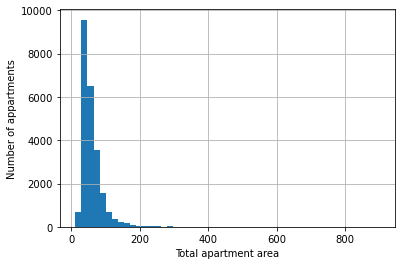

In [9]:
data['total_area'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Total apartment area')
plt.ylabel('Number of appartments')

Text(0, 0.5, 'Number of appartments')

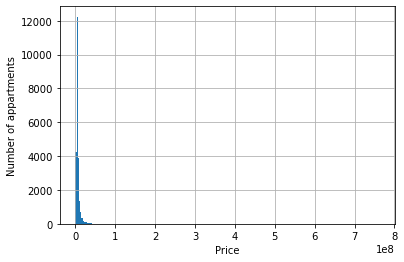

In [10]:
data['last_price'].plot(kind = 'hist', bins = 250, grid = True)
plt.xlabel('Price')
plt.ylabel('Number of appartments')

Text(0, 0.5, 'Number of appartments')

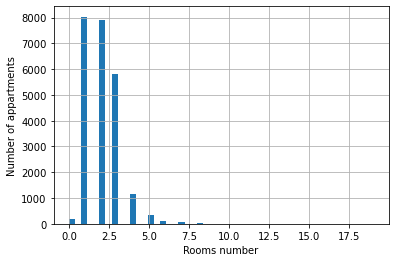

In [11]:
data['rooms'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Rooms number')
plt.ylabel('Number of appartments')

Text(0, 0.5, 'Number of appartments')

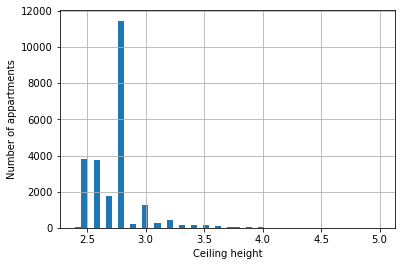

In [12]:
data['ceiling_height'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Ceiling height')
plt.ylabel('Number of appartments')

According to the total_area histogram, we can say that the main part of the values is concentrated in values up to 200, but there are individual values over 800, most likely values above 200 will not be indicative for us in the study.

The last_price histogram shows that the majority of values are up to 50 million, the rest will be indicative due to the small representation.

The rooms histogram showed that there are objects with an incredibly large number of rooms, while the majority of apartments have up to 7 rooms. It is quite possible to imagine that there is an apartment with 19 rooms, but it is definitely not indicative for the study.

The ceiling height histogram shows that the bulk of the values are approximately up to 3 meters

Text(0, 0.5, 'Number of appartments')

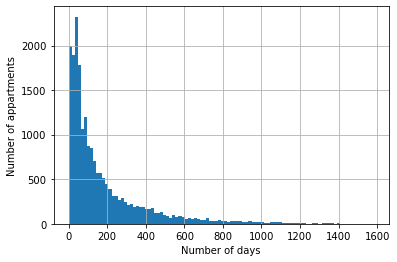

In [13]:
data['days_exposition'].plot(kind = 'hist', bins = 100, grid = True, range=(1, data['days_exposition'].max()))
plt.xlabel('Number of days')
plt.ylabel('Number of appartments')

In [14]:
#Exclude from the selection the missing values of the days_exposition column earlier, we equated them 
#to 0 for convenience, but now they can distort the data for us, and we will calculate the median and average values
good_data = data[data['days_exposition']>0]

In [15]:
good_data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

The standard deviation is quite large, which may indicate that there are serious anomalies or outliers in the sample.

In my opinion, if an apartment is sold before six months, then this is quite a normal sale period for an apartment, but when the period is more than six months, or even more than a year, then this is already a very long time. Half of the apartments from the sample were sold within 3 months, which is a very short period for selling an apartment. The remaining half sold both quickly and for a very long time, an average of 180 days.

Let's build a distribution diagram to estimate the limits of normal values and the number of outliers.

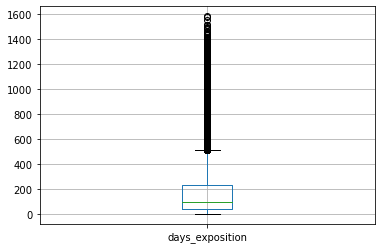

In [16]:
good_data.boxplot(column='days_exposition')
plt.show()

So, according to the distribution diagram, it can be seen that the lower mustache rests on 0, the upper one on the value of 500, this is the approximate border of the normal range, the rest are outliers and there are quite a lot of them, but the values that the upper mustache cut off are rare, since the median does not tend to long tail of large values.

Let's build a histogram based on normal values to look at the data in even more detail.

<AxesSubplot:ylabel='Frequency'>

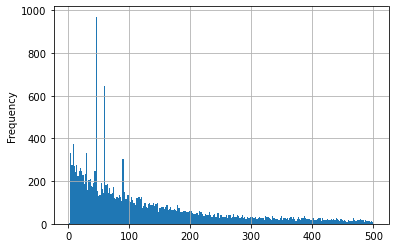

In [17]:
good_data['days_exposition'].plot(kind = 'hist', bins = 250, grid = True, range=(1, 500))

In [18]:
good_data['days_exposition'].value_counts().head()

45    879
60    538
7     234
30    208
90    203
Name: days_exposition, dtype: int64

The number of sales with a period of 45, 60, 7, 30 and 90 days is incredibly huge, most likely the sale happened faster, but the seller or agent forgot or did not have time to remove the ad and it was advertizing until the end of the placement period.

Now let's look at factors that most affect the cost of an apartment. We will study whether the price depends on a square meter, number of rooms, floor (first or last), distance from the center. We will also consider whether there is a dependence on the date of placement: day of the week, month and year.

0.7691335993258182


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

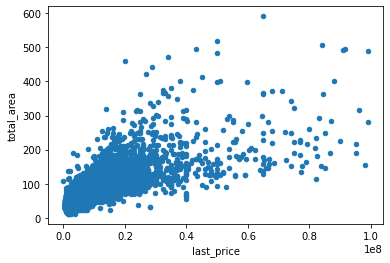

In [19]:
good_data = data[(data['total_area'] < 600) & (data['last_price'] < 100000000)]

print(good_data['last_price'].corr(good_data['total_area']))
good_data.plot(x='last_price', y='total_area', kind='scatter') 

The correlation coefficient of the price dependence on the area of ​​​​the apartment shows a normal positive corelation of the apartment cost on the total area, this can also be seen from the graph.

0.4725643904733227


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

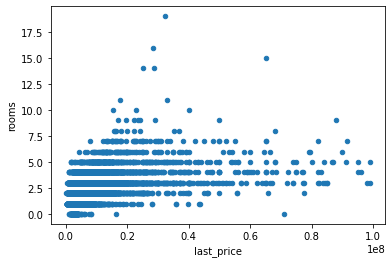

In [20]:
print(good_data['last_price'].corr(good_data['rooms']))
good_data.plot(x='last_price', y='rooms', kind='scatter') 

The correlation between price and number of rooms is even less, in general, this is confirmed by experience, the most expensive in terms of price per square meter are small apartments, then the total cost does not grow so fast.

                median_price  sales_amount
floor_category                            
first                3900000          2911
last                 4300000          3319
other                4835000         17383


<AxesSubplot:xlabel='floor_category'>

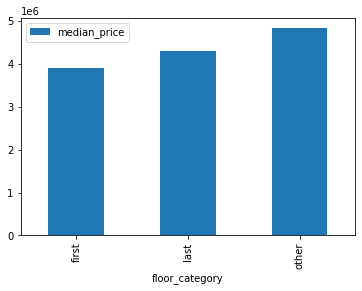

In [21]:
data_pivot = good_data.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

This graph confirms my hypothesis that the first floor is usually the most disliked for the buyer and, as a result, the cheapest, then goes the last floor, it is also not particularly liked by buyers due to the risks of roof leakage, but still last floor is more popular on average and, as a result, more expensive.

Correlation coefficient = -0.30053815097341574
Dataset size = 23613


<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

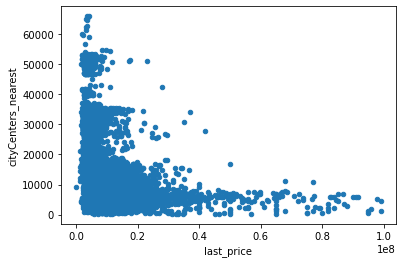

In [22]:
print('Correlation coefficient =', good_data['last_price'].corr(good_data['cityCenters_nearest']))
print('Dataset size =', len(good_data))  
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter') 

The correlation of cost with distance from center is negative, which is logical, the farther from the center, the cheaper housing, but nevertheless, the correlation coefficient shows that the dependence is very weak. Let's check whether this is a consequence of outliers, get rid of them and look at the result. We use a distribution diagram to determine the outliers. It shows that last_price > 25000000 are outliers. Let's filter the dataset by these values and see if the correlation has changed.

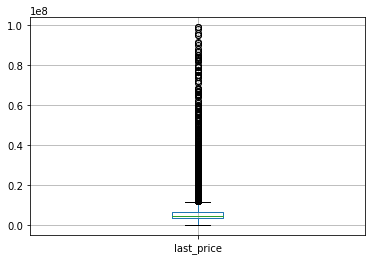

In [23]:
good_data.boxplot(column='last_price')
plt.show()

Correlation coefficient = -0.35237974087441926
Dataset size = 23157


<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

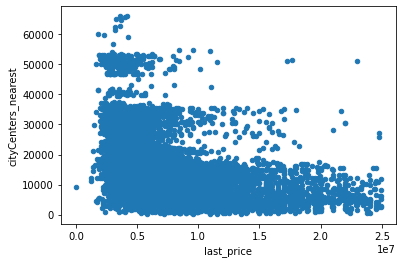

In [24]:
good_data = data[data['last_price'] < 25000000]
print('Correlation coefficient =',good_data['last_price'].corr(good_data['cityCenters_nearest']))
print('Dataset size =', len(good_data))  
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter') 

As we can see, by the size of the filtered dataset, we cut off a small number of data, while the correlation coefficient, after filtering outliers, began to show a slightly lower dependence of the price on proximity to the center, but nevertheless, the indicator is not very high.

Now let's check whether the day of the week somehow affects the value of the property:

         median_price  sales_amount
weekday                            
0             4650000          3606
1             4720000          4175
2             4700000          3966
3             4650000          4286
4             4577500          3992
5             4575000          1933
6             4550000          1692


<AxesSubplot:xlabel='weekday'>

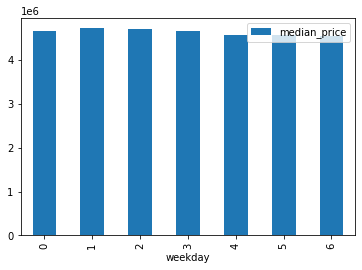

In [25]:
data_pivot = data.pivot_table(index='weekday', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

Nearly identical values, no effect.

Let's check whether the month of placement affects the cost of the object:

       median_price  sales_amount
month                            
1           4600000          1491
2           4650000          2639
3           4650000          2582
4           4800000          2373
5           4500000          1270
6           4400000          1755
7           4650000          1690
8           4570000          1742
9           4700000          1979
10          4560000          2124
11          4700000          2367
12          4695000          1638


<AxesSubplot:xlabel='month'>

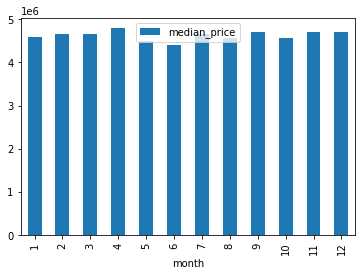

In [26]:
data_pivot = data.pivot_table(index='month', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

In general, indicators are quite the same, May, June are a little out of place, perhaps this is somehow connected with summer holidays, but the difference is not significant.

And now let's analyze how the average price has changed over the years:

                median_price  sales_amount
year_published                            
2014                 7640000           136
2015                 5350000          1173
2016                 4550000          2765
2017                 4500000          8185
2018                 4550000          8512
2019                 5050000          2879


<AxesSubplot:xlabel='year_published'>

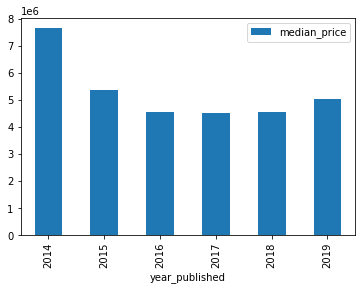

In [27]:
data_pivot = data.pivot_table(index='year_published', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

The graph shows a very high figure for 2014, but there are only 136 values that can very easily be affected by several large values, so we can not focus too much on this year. In 2016-2018, there was a drawdown of the average price, followed by an increase in 2019 to the level of 2015.

Let's choose 10 settlements with the largest number of ads.

In [28]:
data_pivot = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
data_pivot.columns = ['mean', 'count']
data_pivot.sort_values(by='count', ascending=False).head(10)


,mean,count
locality_name,,
Санкт-Петербург,114849.008956,15721
посёлок Мурино,85752.188506,522
посёлок Шушары,78677.363636,440
Всеволожск,68654.475628,398
Пушкин,103125.818157,369
Колпино,75424.581953,338
посёлок Парголово,90175.915291,327
Гатчина,68746.147231,307
деревня Кудрово,92473.546488,299


Let's calculate the average price per square meter in these settlements. Let's select the settlements with the highest and lowest cost of housing.

The maximum cost per square meter is as expected in St. Petersburg, followed by Pushkin and the village of Kudrovo, while Vyborg is in last 10th place.

We will also plot the distribution of the cost per square meter to look at outliers. It can be seen from the diagram that values over 200,000 per square meter are outliers.

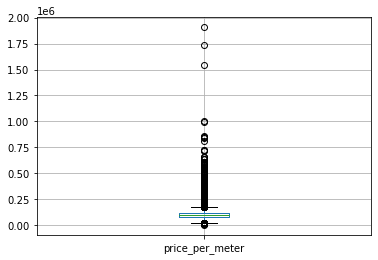

In [29]:
data.boxplot(column='price_per_meter')
plt.show()

<AxesSubplot:>

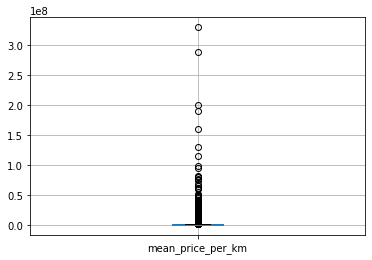

In [30]:
data[data['cityCenters_nearest'].isna()] = data['cityCenters_nearest'].median() #replace empty values with medians
data['distance'] = (data['cityCenters_nearest']/1000).round() #convert the values to kilometers and round
data['distance'] = data['distance'].astype('int')   #convert the value type to integer
data['mean_price_per_km'] = (data['last_price']/data['distance']).round()  #calculate the average price per kilometer

good_data = data.loc[(data['locality_name'] == 'Санкт-Петербург')]   
good_data.boxplot(column='mean_price_per_km')

To sample ads from St. Petersburg, we will plot the distribution of values to estimate the outliers. The graph shows that there are several outliers that accurately distort the representation. Limit the sample to 10000000 to discard very distant values

Correlation coeficient = -0.6480274909515464


<AxesSubplot:xlabel='distance', ylabel='mean_price_per_km'>

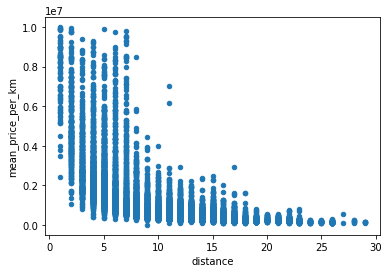

In [31]:
good_data = good_data.loc[(data['mean_price_per_km'] < 10000000) & (data['mean_price_per_km'] > 0)]
print('Correlation coeficient =',good_data['distance'].corr(good_data['mean_price_per_km']))
good_data.plot(x='distance', y='mean_price_per_km', kind='scatter') 

The graph shows that a sharp change in the trend occurs in a place for objects located up to 8 km from the center, then prices decrease less sharply with distance from the center. It can be considered the central part of the city.

Let's select a segment of apartments in the center. Let's analyze this territory and study the following parameters: area, price, number of rooms, ceiling height:

In [32]:
good_data = good_data[(good_data['distance'] <= 8) & (good_data['total_area'] <800) & (good_data['mean_price_per_km'] < 10000000)]
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday,month,year_published,floor_category,k_kitchen,k_living_area,distance,mean_price_per_km
3,0,64900000,159.0,2015-07-24 00:00:00,3,2.8,14,89.8,9,False,...,424,408176.1,4,7,2015,other,0.185535,0.564780,7,9271429.0
4,2,10000000,100.0,2018-06-19 00:00:00,2,3.0,14,32.0,13,False,...,121,100000.0,1,6,2018,other,0.410000,0.320000,8,1250000.0
24,8,6500000,97.2,2015-10-31 00:00:00,2,2.8,3,46.5,1,False,...,265,66872.4,5,10,2015,first,0.201646,0.478395,2,3250000.0
35,6,15500000,149.0,2017-06-26 00:00:00,5,2.8,5,104.0,4,False,...,644,104026.8,0,6,2017,other,0.114094,0.697987,4,3875000.0
51,7,45000000,161.0,2017-10-17 00:00:00,3,3.2,8,38.0,4,False,...,541,279503.1,1,10,2017,other,0.310559,0.236025,7,6428571.0


Text(0, 0.5, 'Number of objects')

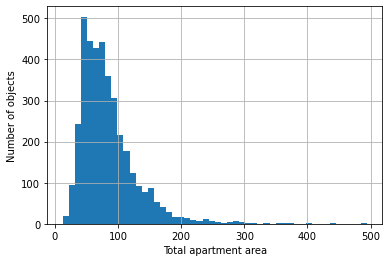

In [33]:
good_data['total_area'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Total apartment area')
plt.ylabel('Number of objects')

In general, the histogram is similar to the chart for the entire sample, but it is smaller, since very outlier values have been cut off.

Text(0, 0.5, 'Number of objects')

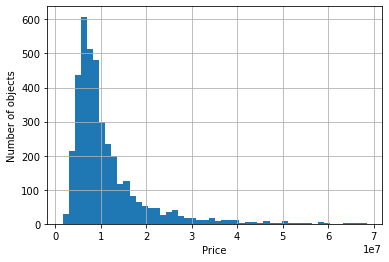

In [34]:
good_data['last_price'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Price')
plt.ylabel('Number of objects')

The price histogram, without strong outliers, has become similar to a normal distribution curve.

Text(0, 0.5, 'Number of objects')

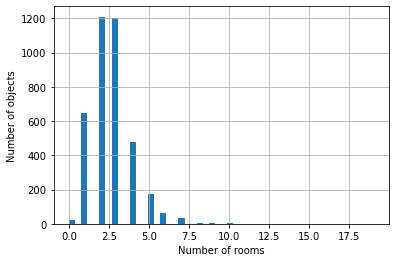

In [35]:
good_data['rooms'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Number of rooms')
plt.ylabel('Number of objects')

In St. Petersburg, apartments with 2-3 rooms prevail over studios and apartments with a large number of rooms, while studios and one-room apartments dominated in the overall sample.

Text(0, 0.5, 'Number of objects')

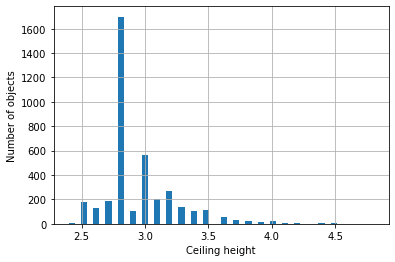

In [36]:
good_data['ceiling_height'].plot(kind = 'hist', bins = 50, grid = True)
plt.xlabel('Ceiling height')
plt.ylabel('Number of objects')

In terms of ceiling height, St. Petersburg apartments differ from the general sample in that quite a few values ​​are more than 2.7 meters and higher, while values of 2.7 and lower prevailed in the general sample.

Let's highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the ad) and analyze whether they differ from the general conclusions for the entire database.

0.7231798005740933


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

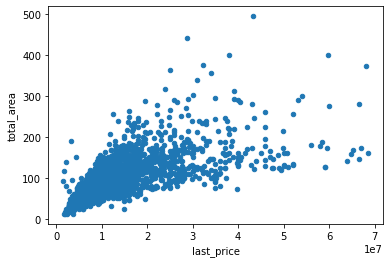

In [37]:
print(good_data['last_price'].corr(good_data['total_area']))
good_data.plot(x='last_price', y='total_area', kind='scatter') 

The price correlation for St. Petersburg is very similar to the correlation for the entire sample, and is only slightly inferior to it. The correlation of these two indicators is quite high, that is, the larger the apartment, the higher the price.

0.4439015690354848


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

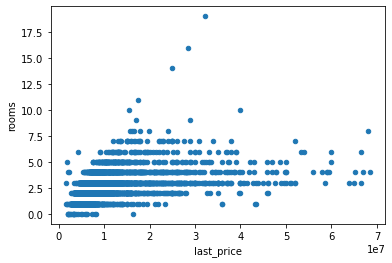

In [38]:
print(good_data['last_price'].corr(good_data['rooms']))
good_data.plot(x='last_price', y='rooms', kind='scatter') 

The correlation between price and number of rooms is average and similar to the overall sample.

                median_price  sales_amount
floor_category                            
first                6225000           418
last                 8600000           636
other                8950000          2795


<AxesSubplot:xlabel='floor_category'>

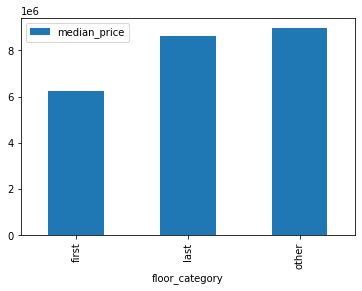

In [39]:
data_pivot = good_data.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

In St. Petersburg, the last floors are valued equally with the middle ones, but the first one is also not held in high esteem as in the general sample

         median_price  sales_amount
weekday                            
0             8900000           582
1             8400000           663
2             8630000           664
3             8500000           784
4             8480000           640
5             8150000           285
6             8900000           231


<AxesSubplot:xlabel='weekday'>

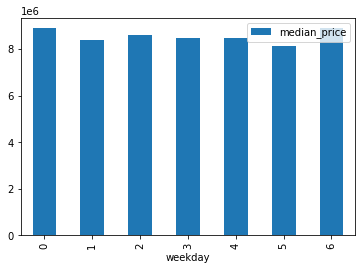

In [40]:
data_pivot = good_data.pivot_table(index='weekday', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

The day of the week practically does not affect the price of the apartment, as well as in the general sample.

       median_price  sales_amount
month                            
1           8600000           236
2           8500000           408
3           8721680           411
4           8400000           363
5           8450000           225
6           8499500           306
7           8894444           310
8           8600000           293
9           9000000           347
10          8300000           324
11          8900000           373
12          7500000           253


<AxesSubplot:xlabel='month'>

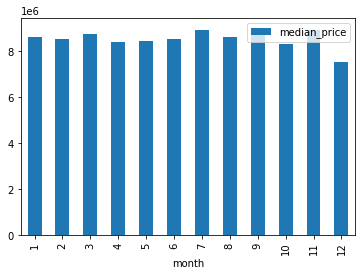

In [41]:
data_pivot = good_data.pivot_table(index='month', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

In St. Petersburg, the cost of apartments throughout the year is approximately the same, except for December (prices are much lower in December), which differs from the general sample.

                median_price  sales_amount
year_published                            
2014                13744000            29
2015                 9000000           317
2016                 8990000           529
2017                 8500000          1362
2018                 8370000          1191
2019                 8700000           421


<AxesSubplot:xlabel='year_published'>

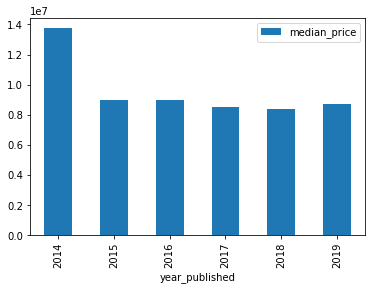

In [42]:
data_pivot = good_data.pivot_table(index='year_published', values='last_price', aggfunc=['median', 'count'])
data_pivot.columns = ['median_price', 'sales_amount']
print(data_pivot)

data_pivot.plot(y='median_price', kind = 'bar')

We will not consider 2014, since the sample is too small and indicative, for all other years the price remained practically unchanged.

## General conclusion

During the study, it turned out that users quite often do not indicate the height of the ceiling, most likely because they do not know or do not consider this an important indicator. Also, users do not consider it necessary to indicate that there are no balconies, which leads to the appearance of a huge number of NaN values, it may be worth giving the user a choice of options, and not the ability to enter it on their own, the same applies to options for the is_apartment pointer.

In the course of the work, missing values were filled in, and the data type was changed where it was necessary for the study.

As a result of the study, the following conclusions were drawn:
- most of all apartments with an area of about 50 square meters, in St. Petersburg the most apartments with an area of 50-70 meters
- the bulk of apartments worth up to 20 million, while in St. Petersburg apartments are on average more expensive.
- the most common apartments are odnushki and dvushki, in St. Petersburg, more dvushki treshki are common
- most often the ceiling height is 2.7 meters, but there are also quite a few objects with a height of 2.5-2.6, in St. Petersburg the height of the ceilings is on average higher than in the entire sample
- there are a huge number of sales with a period of 45, 60, 7, 30 and 90 days, most likely the sale happened faster, but the seller or agent forgot or did not have time to remove the ad and it hung until the end of the placement period.
- the maximum cost per square meter, as expected in St. Petersburg, followed by Pushkin and the village of Kudrovo, while Vyborg is in last 10th place in the top.
- The center of St. Petersburg can be considered a circle with a radius of 8 kilometers, here the cost of real estate is very different (higher) from objects located further, then prices decrease less sharply with distance from the center.

Based on the entire sample, the cost of an apartment depends very much on the total area, less on the number of rooms, and whether it is the first / last floor or the middle one, in St. Petersburg the situation is similar, except that in St. Petersburg the last floors are valued a little more than in the whole sample. Also, there is not a strong dependence of the cost on the distance from the center. And it doesn’t matter at all what day of the week or month the ad was posted, except that in May-June prices are falling, most likely due to low demand, while if we consider St. Petersburg, then the period of low demand is December.

As a result of the work, many anomalies in the data were revealed, and in almost every indicator, for example, there are exorbitant values of total_area, last_price, rooms, ceiling_height. Anomalies were either normalized or filtered for data analysis. Usually fraud is done in the area of price, and the distribution diagram shows that the price per square meter over 200,000 is an anomaly. When studying an object, I would advise you to rely on the average value of the cost per square meter for the settlement, as a guideline, for example, in St. for 200,000 raise questions.

At the same time, it must be remembered that the price per square meter of one room apartment will differ from the price per square meter of two rooms apartments, the price for an apartment in the center will differ from the price for an apartment on the outskirts, and the average price should be used only as a guide when studying a particular object.